In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os import path

Lets check Rust code.

In [2]:
# A function which can sort dataframes in a list of a dataframes. Based on bubble sort.
def sort_dataframe(dataframes: list, key: str):
    swapped = True
    while (swapped):
        swapped = False
        for i in range(len(dataframes)-1):
            # dataframes[i] gives us the ith dataframe, dataframes[i][key] gives us the right column and 
            # dataframes[i][key][0] gives us the first element of that column. We can do this because 
            # key should be equal for the whole column.
            a = dataframes[i][key][0]
            b = dataframes[i+1][key][0]
            if a > b:
                temp = dataframes[i]
                dataframes[i] = dataframes[i+1]
                dataframes[i+1] = temp
                swapped = True

In [11]:
# We load data
df_rust_my_default = pd.read_csv(path.join("..", "rust", "20231227-171113-nb=128-th=524288-r.csv"))
df_rust_default = pd.read_csv(path.join("..", "rust", "20231227-173557-nb=128-th=262144-r.csv"))
df_rust_equal = pd.read_csv(path.join("..", "rust", "20231227-175653-nb=32-th=1048576-r.csv"))

In [13]:
dfs_rust = [df_rust_my_default, df_rust_default, df_rust_equal]

In [14]:
# We calculate runtime per integer
for df in dfs_rust:
    df["runtime/integer [ns]"] = df["total_runtime"] / (df["total_runs"] * df["integers"])

Text(0.5, 1.0, 'Comapring cip_shuffle threshold')

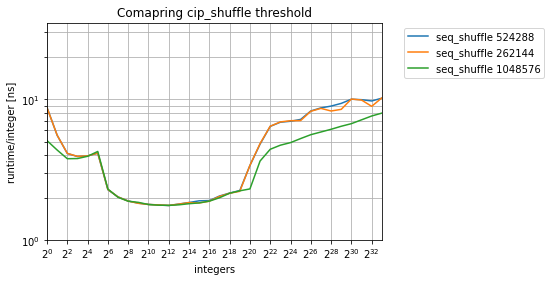

In [15]:
# We plot data
ax_xticks = [2 ** i for i in range(0, 34, 2)]
ax_yticks = [1 * i for i in range(0, 50, 1)]

ax = dfs_rust[0].plot(x="integers", y="runtime/integer [ns]", label=dfs_rust[0]["function"][0] + " " + str(dfs_rust[0]["threshold"][0]))
for i in range(1, len(dfs_rust)):
    dfs_rust[i].plot(ax=ax, x="integers", y="runtime/integer [ns]", label=dfs_rust[i]["function"][0] + " " + str(dfs_rust[i]["threshold"][0]))

ax.set_xscale("log", base=2)
ax.set_yscale("log", base=10)
ax.set_xticks(ax_xticks)
ax.set_yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50])
ax.set_xlim(2**0, 2**33)
ax.set_ylim(1, 35)
ax.grid(True, which="both")
ax.set_xlabel("integers")
ax.set_ylabel("runtime/integer [ns]")
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax.set_title("Comapring cip_shuffle threshold")

Lools like ? is the way to go!

In [12]:
# Lets compare the other ones
df_std_shuffle = pd.read_csv(path.join("..", "cpp", "uni-machine", "v0.1.9", "base_case", "20231213-020409-nb=0-bf=0-th=0-cpp.csv"))
df_fy_shuffle_32 = pd.read_csv(path.join("..", "cpp", "uni-machine", "v0.1.9", "base_case", "20231213-021932-nb=0-bf=0-th=0-cpp.csv"))
df_buffered_dynamic = pd.read_csv(path.join("..", "cpp", "uni-machine", "v0.1.11", "buffered", "20231214-023431-nb=0-bf=256-th=0-cpp.csv"))
df_buffered = pd.read_csv(path.join("..", "cpp", "uni-machine", "v0.1.12", "buffered", "20231214-211310-nb=0-bf=256-th=0-cpp.csv"))
df_bucket_32 = pd.read_csv(path.join("..", "cpp", "uni-machine", "v0.1.12", "buckets", "20231215-015936-nb=32-bf=256-th=262144-cpp.csv"))

In [13]:
df_std_shuffle["runtime/integer [ns]"] = (df_std_shuffle["total_runtime"] / df_std_shuffle["total_runs"]) / df_std_shuffle["integers"]
df_fy_shuffle_32["runtime/integer [ns]"] = (df_fy_shuffle_32["total_runtime"] / df_fy_shuffle_32["total_runs"]) / df_fy_shuffle_32["integers"]
df_buffered_dynamic["runtime/integer [ns]"] = (df_buffered_dynamic["total_runtime"] / df_buffered_dynamic["total_runs"]) / df_buffered_dynamic["integers"]
df_buffered["runtime/integer [ns]"] = (df_buffered["total_runtime"] / df_buffered["total_runs"]) / df_buffered["integers"]
df_bucket_32["runtime/integer [ns]"] = (df_bucket_32["total_runtime"] / df_bucket_32["total_runs"]) / df_bucket_32["integers"]

Text(0.5, 1.0, 'Comapring some shhuffle algorithms')

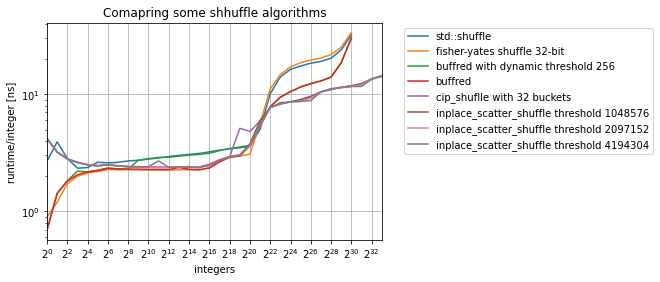

In [29]:
# We plot data
ax_xticks = [2 ** i for i in range(0, 40, 2)]
ax_yticks = [1 * i for i in range(0, 50, 1)]

ax = df_std_shuffle.plot(x="integers", y="runtime/integer [ns]", label="std::shuffle")
df_fy_shuffle_32.plot(ax=ax, x="integers", y="runtime/integer [ns]", label="fisher-yates shuffle 32-bit")
df_buffered_dynamic.plot(ax=ax, x="integers", y="runtime/integer [ns]", label="buffred with dynamic threshold 256")
df_buffered.plot(ax=ax, x="integers", y="runtime/integer [ns]", label="buffred")
df_bucket_32.plot(ax=ax, x="integers", y="runtime/integer [ns]", label="cip_shuflle with 32 buckets")

index = 10
# dfs_threshold[index].plot(ax=ax, x="integers", y="runtime/integer [ns]", label=dfs_threshold[index]["function"][0] + " threshold " + str(dfs_threshold[index]["threshold"][0]))
dfs_threshold[10].plot(ax=ax, x="integers", y="runtime/integer [ns]", label=dfs_threshold[10]["function"][0] + " threshold " + str(dfs_threshold[10]["threshold"][0]))
dfs_threshold[11].plot(ax=ax, x="integers", y="runtime/integer [ns]", label=dfs_threshold[11]["function"][0] + " threshold " + str(dfs_threshold[11]["threshold"][0]))
dfs_threshold[12].plot(ax=ax, x="integers", y="runtime/integer [ns]", label=dfs_threshold[12]["function"][0] + " threshold " + str(dfs_threshold[12]["threshold"][0]))

ax.set_xscale("log", base=2)
ax.set_yscale("log", base=10)
ax.set_xticks(ax_xticks)
# ax.set_yticks(ax_yticks)
ax.set_xlim(2**0, 2**33)
# ax.set_ylim(0, 15)
ax.grid(True)
ax.set_xlabel("integers")
ax.set_ylabel("runtime/integer [ns]")
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax.set_title("Comapring some shhuffle algorithms")